<a href="https://colab.research.google.com/github/utkarshinobi/BooksSentimentAnalysis/blob/Dataset-Analysis/Top_100_Bestseller_Book_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports and Configurations

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Set the option to display full content
pd.set_option('display.max_colwidth', 100)

### Books Dataset Analysis

In [33]:
books = pd.read_csv('/content/drive/MyDrive/BooksDataset/Top-100 Trending Books.csv')

In [34]:
books.columns

Index(['Rank', 'book title', 'book price', 'rating', 'author',
       'year of publication', 'genre', 'url'],
      dtype='object')

In [36]:
books.shape

(100, 8)

In [35]:
len(books['url'].unique())

100

In [48]:
duplicates = books[books['book title'].duplicated(keep=False)]

print("Values that are not unique in column 'book title':")
print(duplicates)

Values that are not unique in column 'book title':
    Rank  \
10    11   
86    87   

                                                                      book title  \
10  The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)   
86  The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)   

    book price  rating           author  year of publication  \
10       10.99     4.6  Suzanne Collins                 2020   
86       15.79     4.6  Suzanne Collins                 2020   

                                                         genre  \
10  Adventure, War, Science fiction, Romance, Action, Thriller   
86  Adventure, War, Science Fiction, Romance, Action, Thriller   

                                                                                                                  url  
10  amazon.com/Ballad-Songbirds-Snakes-Hunger-Games/dp/1339016575/ref=zg_bs_g_books_sccl_11/143-9831347-1043253?psc=1  
86  amazon.com/Ballad-Songb

In [47]:
print(pd.DataFrame(duplicates)['url'])

10    amazon.com/Ballad-Songbirds-Snakes-Hunger-Games/dp/1339016575/ref=zg_bs_g_books_sccl_11/143-9831347-1043253?psc=1
86    amazon.com/Ballad-Songbirds-Snakes-Hunger-Games/dp/1338635174/ref=zg_bs_g_books_sccl_87/142-7825522-0098658?psc=1
Name: url, dtype: object


In [61]:
# Group by 'author' and count the number of books
author_book_count = pd.DataFrame(books.groupby('author')['book title'].count().reset_index(name='book count'))

In [67]:
author_book_count = author_book_count[author_book_count['book count'] >1 ]

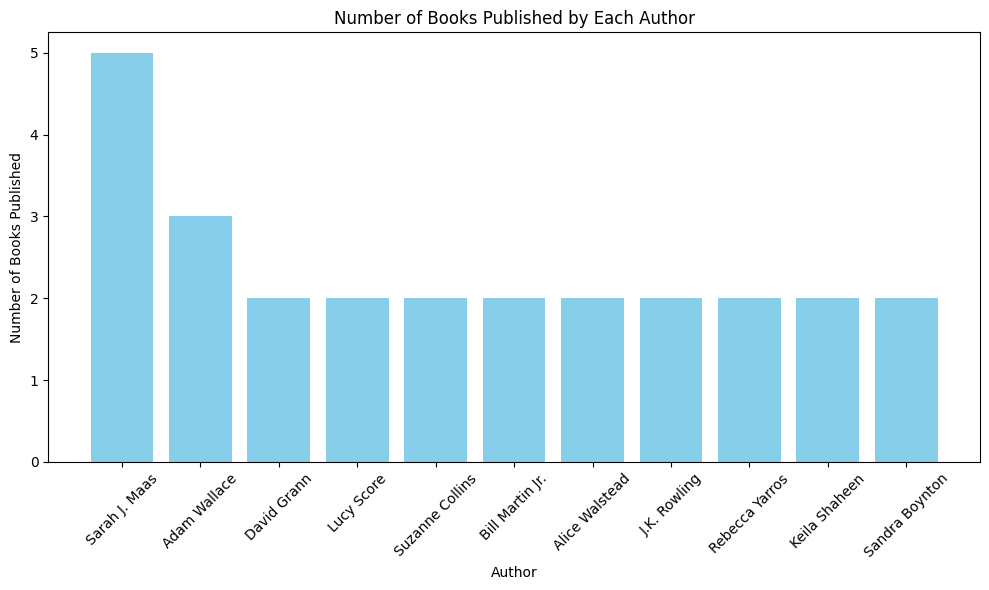

In [68]:
# Sort the authors by the number of books in descending order
author_book_count = author_book_count.sort_values(by='book count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(author_book_count['author'], author_book_count['book count'], color='skyblue')
plt.xlabel('Author')
plt.ylabel('Number of Books Published')
plt.title('Number of Books Published by Each Author')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
books.isnull().sum()

Rank                   0
book title             0
book price             0
rating                 3
author                 0
year of publication    0
genre                  0
url                    0
dtype: int64

#### **Notes**
1. Books dataset with 100 books.
  There's 1 duplicate book title - The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)
  *   One is paperback
  *   Other is hard cover.

  Can analyse how the reviews differ here or merge the reviews.

---



### Review Dataset Analysis

In [49]:
df = pd.read_csv('/content/drive/MyDrive/BooksDataset/customer reviews.csv')

In [50]:
df.columns

Index(['Sno', 'book name', 'review title', 'reviewer', 'reviewer rating',
       'review description', 'is_verified', 'date', 'timestamp', 'ASIN'],
      dtype='object')

In [53]:
review_counts = df.groupby('book name')

In [57]:
review_counts.head()

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fast.The print quality of the book is very good. I l...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scared to speak up because I was afraid somebody would...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an inspiration and helped motivate me to be strong like you.,Jamie,5,The media could not be loaded. I personally have been in the same exact situations as some of th...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the '00s. She is just a couple years older than me. I...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read. Britney takes you in her world and shares her pe...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
...,...,...,...,...,...,...,...,...,...,...
910,910,The Wonky Donkey,Donkey Listen and Laugh Along - The Wonky Donkey!,Family Man,5,Take a break from your dystopian novels and dive into the silly world of The Wonky Donkey. This ...,True,01-09-2023,"Reviewed in the United States September 1, 2023",545261244
911,911,The Wonky Donkey,Great book! Highly Recommend,Shellie Rouse,5,We just love this book!. I will buy more in this line..My grandbaby just loves it. We read it at...,True,01-11-2023,"Reviewed in the United States November 1, 2023",545261244
912,912,The Wonky Donkey,Hilarious play on words and rhymes.,Kindle Customer,5,"I admit it, I saw the Scottish grandmother trying to read this book to her grandchild. I was int...",True,28-10-2023,"Reviewed in the United States October 28, 2023",545261244
913,913,The Wonky Donkey,Great toddler/ 1st reader book,K. Lehigh,5,The story is hilarious! The book is made of a very nice thick cardboard. At first my granddaught...,True,25-10-2023,"Reviewed in the United States October 25, 2023",545261244
